
# MNIST Neural Network Demo


**What you'll learn**
- What the MNIST dataset is
- How to clean & prepare image data
- How a basic neural network (multilayer perceptron) is built and trained
- How to evaluate accuracy and make predictions



## 1) Setup & Imports
This notebook uses **TensorFlow/Keras**. If it's not installed, run:
```bash
pip install tensorflow matplotlib numpy
```


In [13]:

# Core libraries
import sys, os, math, time
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow/Keras availability
try:
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Flatten, Dropout
    from tensorflow.keras.utils import to_categorical
    TF_AVAILABLE = True
    print("TensorFlow version:", tf.__version__)
except Exception as e:
    TF_AVAILABLE = False
    print("TensorFlow/Keras not available. Will use the fallback dataset and model later.\n", e)


TensorFlow version: 2.20.0



## 2) Load & Explore the MNIST Dataset
MNIST contains **70,000** 28×28 grayscale images of digits (60,000 train / 10,000 test).


In [14]:

if TF_AVAILABLE:
    try:
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        print("Train:", x_train.shape, y_train.shape)
        print("Test :", x_test.shape, y_test.shape)
    except Exception as e:
        print("Downloading MNIST failed. You can continue to the fallback section below.\n", e)
else:
    print("Skip: TensorFlow not available.")


Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)



### Quick Look at the Data
Let's peek at some training images to understand what the model will learn.


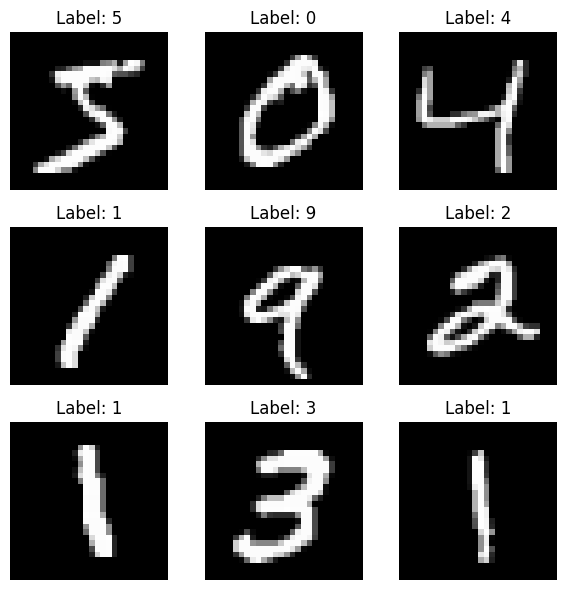

In [15]:

if TF_AVAILABLE and 'x_train' in globals():
    plt.figure(figsize=(6,6))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_train[i], cmap="gray")
        plt.title(f"Label: {y_train[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("Skip: MNIST not loaded.")



## 3) Preprocess Data
- **Normalize** pixel values from `[0, 255]` → `[0, 1]`
- **One-hot encode** labels (e.g. `3` → `[0,0,0,1,0,0,0,0,0,0]`)


In [16]:

if TF_AVAILABLE and 'x_train' in globals():
    x_train = x_train.astype("float32") / 255.0
    x_test  = x_test.astype("float32") / 255.0
    y_train_cat = to_categorical(y_train, 10)
    y_test_cat  = to_categorical(y_test, 10)
    print("x_train range:", (x_train.min(), x_train.max()))
    print("y_train one-hot shape:", y_train_cat.shape)
else:
    print("Skip: MNIST not loaded.")


x_train range: (np.float32(0.0), np.float32(1.0))
y_train one-hot shape: (60000, 10)



## 4) Build a Simple Neural Network
We'll use a **Multilayer Perceptron (MLP)**:
- Flatten 28×28 images → 784 inputs
- Dense (128) with ReLU activation
- Dropout (optional) to reduce overfitting
- Dense (10) with Softmax for the output classes (digits 0–9)


In [17]:

if TF_AVAILABLE and 'x_train' in globals():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
else:
    print("Skip: MNIST not loaded.")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


## 5) Train the Model
We train for a few **epochs** (full passes through the dataset). More epochs usually means better accuracy—up to a point.


In [18]:

if TF_AVAILABLE and 'x_train' in globals():
    history = model.fit(
        x_train, y_train_cat,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=2
    )
else:
    print("Skip: MNIST not loaded.")


Epoch 1/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9094 - loss: 0.3087 - val_accuracy: 0.9638 - val_loss: 0.1289
Epoch 2/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9558 - loss: 0.1495 - val_accuracy: 0.9737 - val_loss: 0.0909
Epoch 3/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9667 - loss: 0.1101 - val_accuracy: 0.9757 - val_loss: 0.0785
Epoch 4/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9721 - loss: 0.0899 - val_accuracy: 0.9778 - val_loss: 0.0743
Epoch 5/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9757 - loss: 0.0756 - val_accuracy: 0.9767 - val_loss: 0.0730
Epoch 6/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9791 - loss: 0.0658 - val_accuracy: 0.9797 - val_loss: 0.0732
Epoch 7/10
1688/1688 - 2s - 1ms/step - accuracy: 0.9817 - loss: 0.0563 - val_accuracy: 0.9770 - val_loss: 0.0796
Epoch 8/10
1688/1688 - 3s - 2ms/step - accuracy: 0.9833 - loss: 0.0526 - val_accuracy: 0.9800 - val_loss: 0.0745
Epoch 9/10
1688/1688 - 3s - 1ms/step - accuracy: 0.9839 - loss: 0.0484 - val_accuracy: 0.9813 - 


### Training Curves
Look at how **loss** and **accuracy** change over time.


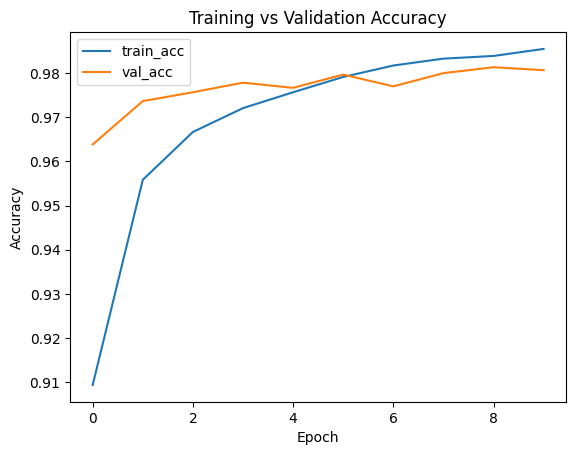

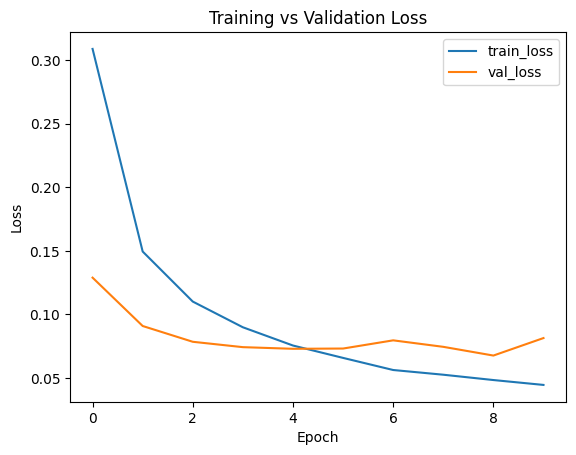

In [19]:

if TF_AVAILABLE and 'history' in globals():
    # Accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')
    plt.show()

    # Loss
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()
else:
    print("Skip: No training history.")



## 6) Evaluate on the Test Set


In [20]:

if TF_AVAILABLE and 'x_test' in globals():
    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
    print("Test accuracy:", round(float(test_acc), 4))
else:
    print("Skip: MNIST not loaded or model not trained.")


Test accuracy: 0.98



## 7) Make Some Predictions


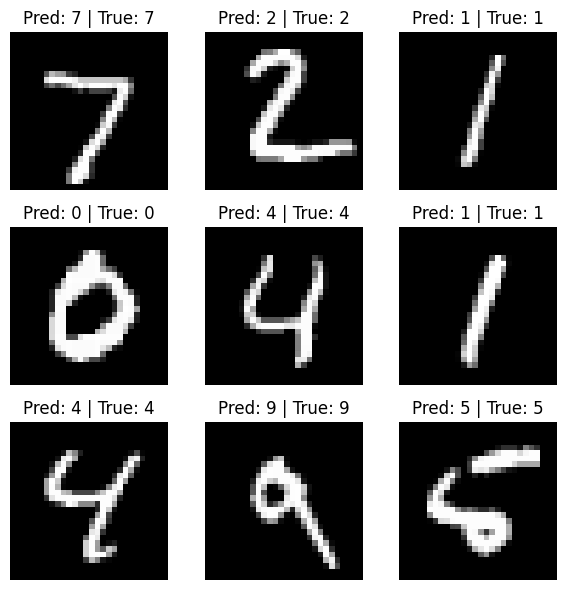

In [21]:

if TF_AVAILABLE and 'x_test' in globals():
    num = 9
    preds = model.predict(x_test[:num], verbose=0)
    plt.figure(figsize=(6,6))
    for i in range(num):
        plt.subplot(3,3,i+1)
        plt.imshow(x_test[i], cmap="gray")
        pred = np.argmax(preds[i])
        plt.title(f"Pred: {pred} | True: {y_test[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("Skip: MNIST not loaded or model not trained.")


---
## 8) Add Your Own Handwritten Numbers
Use this helper to load a photo/scan of your digit, auto-format it to MNIST style (28×28, grayscale, white-on-black), and predict.
Place an image like **`my_digit.png`** in the same folder as this notebook, then run the example call at the bottom.


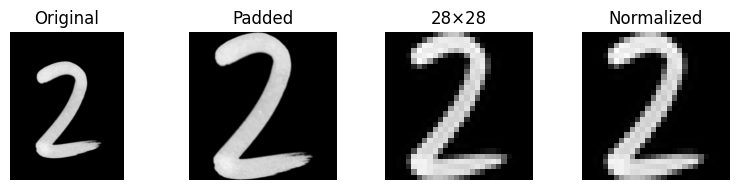

Prediction: 3 (confidence 0.684)


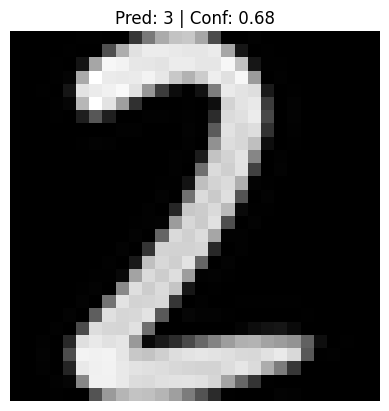

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps


def preprocess_digit(path, target_size=28, show_steps=True):
    img = Image.open(path).convert("L")
    if np.array(img).mean() > 127:
        img = ImageOps.invert(img)
    arr = np.array(img)
    mask = arr > 20
    if mask.any():
        coords = np.argwhere(mask)
        y0, x0 = coords.min(axis=0)
        y1, x1 = coords.max(axis=0) + 1
        img = Image.fromarray(arr[y0:y1, x0:x1])
    w, h = img.size
    side = max(w, h)
    canvas = Image.new("L", (side, side), color=0)
    canvas.paste(img, ((side - w) // 2, (side - h) // 2))
    img28 = canvas.resize((target_size, target_size), Image.Resampling.LANCZOS)
    arr28 = np.asarray(img28).astype("float32") / 255.0
    if show_steps:
        fig, axs = plt.subplots(1, 4, figsize=(8, 2))
        axs[0].imshow(Image.open(path).convert("L"), cmap="gray_r")
        axs[0].set_title("Original")
        axs[0].axis("off")
        axs[1].imshow(canvas, cmap="gray")
        axs[1].set_title("Padded")
        axs[1].axis("off")
        axs[2].imshow(img28, cmap="gray")
        axs[2].set_title("28×28")
        axs[2].axis("off")
        axs[3].imshow(arr28, cmap="gray")
        axs[3].set_title("Normalized")
        axs[3].axis("off")
        plt.tight_layout()
        plt.show()
    return arr28


def predict_custom_digit(path, use_cnn=False):
    img28 = preprocess_digit(path, show_steps=True)
    if use_cnn:
        x = img28[None, ..., None]
        probs = model_cnn.predict(x, verbose=0)[0]
    else:
        x = img28[None, ...]
        probs = model.predict(x, verbose=0)[0]
    pred = int(np.argmax(probs))
    confidence = float(probs[pred])
    print(f"Prediction: {pred} (confidence {confidence:.3f})")
    plt.figure()
    plt.imshow(img28, cmap="gray")
    plt.title(f"Pred: {pred} | Conf: {confidence:.2f}")
    plt.axis("off")
    plt.show()
    return pred, probs


# Example usage:
pred, probs = predict_custom_digit('my_digit.png', use_cnn=False)


## 9) Extension Task
- **Try more epochs** (e.g. 10) and see how accuracy changes.
- **Change the hidden size** (e.g. 256 neurons).
- **Add another hidden layer**.



### (Optional) Convolutional Neural Network (CNN)
CNNs are better for images. This is a minimal example.


In [23]:

if TF_AVAILABLE and 'x_train' in globals():
    # Prepare data for CNN: add channel dimension
    x_train_cnn = np.expand_dims(x_train, -1)
    x_test_cnn  = np.expand_dims(x_test, -1)

    from tensorflow.keras.layers import Conv2D, MaxPooling2D
    model_cnn = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history_cnn = model_cnn.fit(x_train_cnn, y_train_cat, epochs=3, batch_size=32, validation_split=0.1, verbose=2)
    test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
    print("CNN Test accuracy:", round(float(test_acc_cnn), 4))
else:
    print("Skip: TensorFlow not available or MNIST not loaded.")


Epoch 1/3
1688/1688 - 2s - 1ms/step - accuracy: 0.9418 - loss: 0.1876 - val_accuracy: 0.9787 - val_loss: 0.0719
Epoch 2/3
1688/1688 - 5s - 3ms/step - accuracy: 0.9809 - loss: 0.0615 - val_accuracy: 0.9858 - val_loss: 0.0498
Epoch 3/3
1688/1688 - 4s - 3ms/step - accuracy: 0.9870 - loss: 0.0422 - val_accuracy: 0.9860 - val_loss: 0.0499
CNN Test accuracy: 0.9872
